# The Euler Method

Let $\frac{dS(t)}{dt} = F(t,S(t))$ be an explicitly defined first order ODE. That is, $F$ is a function that returns the derivative, or change, of a state given a time and state value.

Also, let $t$ be a numerical grid of the interval $[t_0, t_f]$ with spacing $h$. Without loss of generality, we assume that $t_0 = 0$, and that $t_f = Nh$ for some positive integer, $N$.


The linear approximation of $S(t)$ around $t_j$ at $t_{j+1}$ is

$$
S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j)\frac{dS(t_j)}{dt},
$$

which can also be written

$$
S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).
$$

This formula is called the **Explicit Euler Formula**, and it allows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$.

- Starting from a given initial value of $S_0 = S(t_0)$, we can use this formula to integrate the states up to $S(t_f)$; these $S(t)$ values are then an approximation for the solution of the differential equation.

- The Explicit Euler formula is the simplest and most intuitive method for solving initial value problems. At any state $(t_j, S(t_j))$ it uses $F$ at that state to "point" toward the next state and then moves in that direction a distance of $h$.

- Although there are more sophisticated and accurate methods for solving these problems, they all have the same fundamental structure.

### Reference:

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.03-The-Euler-Method.html

## How do we apply the Euler method in solving ODEs?

Assume we are given a function $F(t, S(t))$ that computes $\frac{dS(t)}{dt}$, a numerical grid, $t$, of the interval, $[t_0, t_f]$, and an initial state value $S_0 = S(t_0)$.

We can compute $S(t_j)$ for every $t_j$ in $t$ using the following steps.

1. Store $S_0 = S(t_0)$ in an array, $S$.

2. Compute $S(t_1) = S_0 + hF(t_0, S_0)$.

3. Store $S_1 = S(t_1)$ in $S$.

4. Compute $S(t_2) = S_1 + hF(t_1, S_1)$.

5. Store $S_2 = S(t_1)$ in $S$.

6. $\cdots$

7. Compute $S(t_f) = S_{f-1} + hF(t_{f-1}, S_{f-1})$.

8. Store $S_f = S(t_f)$ in $S$.

9. $S$ is an approximation of the solution to the initial value problem.

When using a method with this structure, we say the method **integrates** the solution of the ODE.

### Example:
The differential equation $\frac{df(t)}{dt} = e^{-t}$ with initial condition $f_0 = -1$ has the exact solution $f(t) = -e^{-t}$.

(a) Prove this using sympy.

(b) Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 and 0.01 using the Explicity Euler Formula.

(c) Plot the difference between the approximated solution and the exact solution. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp
from sympy import exp

In [12]:
# Part (a)
# Define symbols

f = sp.symbols("f", cls = sp.Function)
t = sp.symbols("t")

ODE: 

$\frac{df(t)}{dt} = e^{-t}$

In [13]:
# Define ODE

diffeq = sp.Eq(f(t).diff(t) - exp(-t), 0)

display(diffeq)


Eq(Derivative(f(t), t) - exp(-t), 0)

ICS: 


$f_0 = -1$

In [15]:
# Solve the ODE:

result = sp.dsolve(diffeq, f(t), ics = {f(0):-1})

display(result)

Eq(f(t), -exp(-t))

### Evaluate the function obtained by sympy:

In [16]:
print(type(result))

<class 'sympy.core.relational.Equality'>


In [6]:
# Generate the time vector
h_1 = 0.1

t_1 = np.arange(0, 1 + h_1, h_1)

print(t_1.shape)

(11,)


In [17]:
# Evaluate the sympy object
y_1 = []

for i in t_1:
    
    y_1.append(result.subs(t, i).args[1])
    
y_1 = np.array(y_1)

print(y_1.shape)

(11,)


### Plotting (1st way):

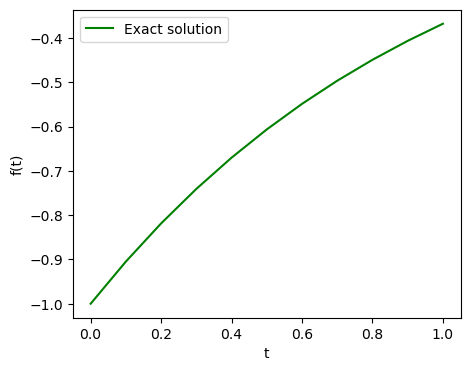

In [18]:
plt.figure(figsize = (5,4))

plt.plot(t_1, y_1, "g", label = "Exact solution")

plt.xlabel('t')
plt.ylabel('f(t)')

plt.legend()
plt.show()

## 2nd way:

In [20]:
# Define function f(t)
f = lambda t, s: np.exp(-t) #f(t)

# Spacing
h_1 = 0.1
h_2 = 0.01

# t_axis

t_1 = np.arange(0, 1 + h_1, h_1)
t_2 = np.arange(0, 1 + h_2, h_2)

f0 = -1.


### Plotting:

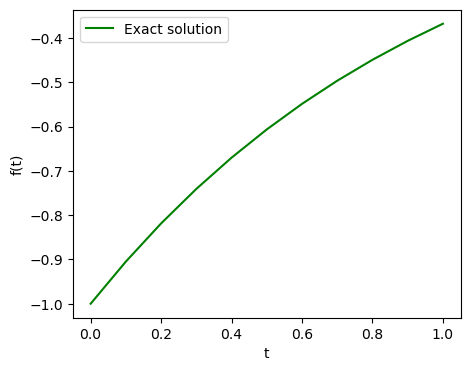

In [21]:
plt.figure(figsize =  (5,4))

plt.plot(t_1, -f(t_1,f0), "g", label = "Exact solution")

plt.xlabel('t')
plt.ylabel('f(t)')

plt.legend()
plt.show()

## Third Way (recommended):


In [24]:
# Extract the right-hand side (the expression for y(t))
y_solution = result.rhs

# Convert to a numerical function using lambdify
y_func = sp.lambdify(t, y_solution, 'numpy')

# See the object type 
print(type(y_solution), type(y_func))

# Test function
print(y_func(0))  # Should return the value of y(0)

<class 'sympy.core.mul.Mul'> <class 'function'>
-1.0


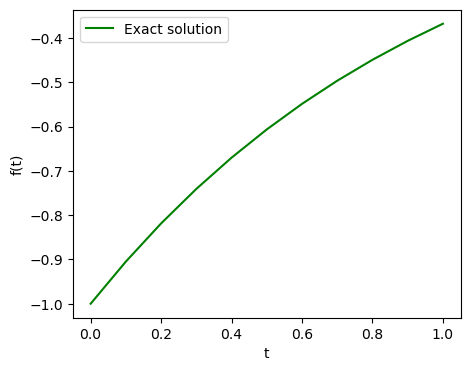

In [25]:
plt.figure(figsize =  (5,4))

plt.plot(t_1, y_func(t_1), "g", label = "Exact solution")

plt.xlabel('t')
plt.ylabel('f(t)')

plt.legend()
plt.show()

### Explicit Euler Method:

We want to implement:

$$
S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).
$$

In [26]:
# Define the initial conditions
f0 = -1

In [28]:
# define the s vectors

s_1 = np.zeros(len(t_1)) # associated with h_1
#print(s_1.shape)

print(s_1)

s_1[0] = f0
print(s_1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


$$
S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).
$$

In [30]:
# Fill up the rest of the array

for j in range(0, len(t_1) - 1):
    #print(j)
    
    s_1[j + 1] = s_1[j] + h_1*f(t_1[j], s_1[j])
    
#print(t_1.shape, s_1.shape)


In [32]:
# define the s vectors

s_2 = np.zeros(len(t_2)) # associated with h_2

s_2[0] = f0

for j in range(0, len(t_2) - 1):
    s_2[j + 1] = s_2[j] + h_2*f(t_2[j], s_2[j])

print(s_2.shape)

(101,)


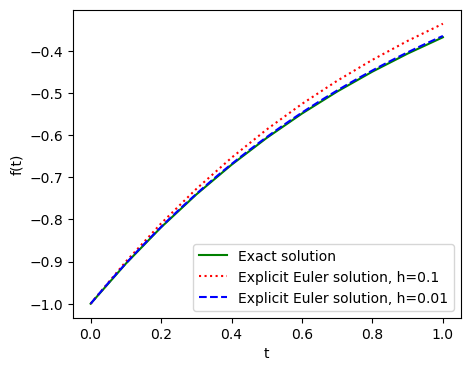

In [33]:
plt.figure(figsize = (5,4))

plt.plot(t_1, -f(t_1,f0), "g", label = "Exact solution")
plt.plot(t_1, s_1, "r", linestyle =':', label = "Explicit Euler solution, h=0.1")
plt.plot(t_2, s_2, "b", linestyle = '--', label = "Explicit Euler solution, h=0.01")


plt.xlabel('t')
plt.ylabel('f(t)')

plt.legend()
plt.show()

## 2. Implicit Euler formula:

The Explicit Euler Formula is called "explicit" because it only requires information at $t_j$ to compute the state at $t_{j+1}$. That is, $S(t_{j+1})$ can be written explicitly in terms of values we have (i.e., $t_j$ and $S(t_j)$). The **Implicit Euler Formula** can be derived by taking the linear approximation of $S(t)$ around $t_{j+1}$ and computing it at $t_j$:

$$
S(t_{j+1}) = S(t_j) + hF(t_{j+1}, S(t_{j+1})).
$$

This formula is peculiar because it requires that we know $S(t_{j+1})$ to compute $S(t_{j+1})$! However, it happens that sometimes we *can* use this formula to approximate the solution to initial value problems.


Before we give details on how to solve these problems using the Implicit Euler Formula, we give another implicit formula called the **Trapezoidal Formula**, which is the average of the Explicit and Implicit Euler Formulas:

$$
S(t_{j+1}) = S(t_j) + \frac{h}{2}(F(t_j, S(t_j)) + F(t_{j+1}, S(t_{j+1}))).
$$

### Implementation of the Implpicit Method:
$$
S(t_{j+1}) = S(t_j) + hF(t_{j+1}, S(t_{j+1})).
$$

In [36]:
# Implicit Euler Method
s_3 = np.zeros(len(t_1)) # wrt h_1
s_3[0] = f0

for j in range(0, len(t_1) - 1):
    s_3[j + 1] = s_3[j] + h_1*f(t_1[j + 1], s_3[j + 1])


### Implementation of the trapezoidal

$$
S(t_{j+1}) = S(t_j) + \frac{h}{2}(F(t_j, S(t_j)) + F(t_{j+1}, S(t_{j+1}))).
$$

In [37]:
# Trapezoidal Euler Method
s_4 = np.zeros(len(t_1))
s_4[0] = f0

for j in range(0, len(t_1) - 1):
    s_4[j + 1] = s_4[j] + h_1*(f(t_1[j], s_4[j])\
                        + f(t_1[j + 1], s_4[j + 1]))/2
    
    

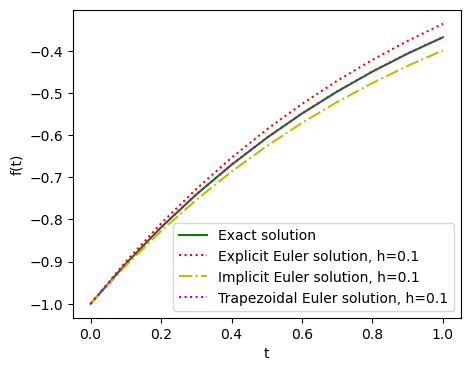

In [38]:
plt.figure(figsize = (5,4))

plt.plot(t_1, -f(t_1,f0), "g", label = "Exact solution")
plt.plot(t_1, s_1, "r", linestyle =':', label = "Explicit Euler solution, h=0.1")
#plt.plot(t_2, s_2, "b", linestyle = '--', label = "Explicit Euler solution, h=0.01")
plt.plot(t_1, s_3, "y", linestyle ='-.', label = "Implicit Euler solution, h=0.1")
plt.plot(t_1, s_4, "m", linestyle =':', label = "Trapezoidal Euler solution, h=0.1")

plt.xlabel('t')
plt.ylabel('f(t)')

plt.legend()
plt.show()